<a href="https://colab.research.google.com/github/angel870326/NTU_Manufacturing_Data_Science/blob/main/MDS_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.11.11 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Manufacturing Data Science Assignment 3**


1.   (40%) Decision Tree Algorithms
2.   (40%) Feature Selection
3.   (20%) Deep Learning


In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mandarin
# from matplotlib.font_manager import FontProperties
# !wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
# font = 'TaipeiSansTCBeta-Regular.ttf'
# fontP = FontProperties(fname='TaipeiSansTCBeta-Regular.ttf')



---


##**1. (40%) Decision Tree Algorithms**

Use Python to solve the problem. The SECOM (Semiconductor Manufacturing) dataset, consists of manufacturing operation data and the semiconductor quality data. It contains 1567 observations taken from a wafer fabrication production line. Each observation is a vector of 590 sensor measurements plus a label of pass/fail test. Also, there are only 104 fail cases which are labeled as positive (encoded as 1: bad), whereas much larger amount of examples pass the test and are labeled as negative (encoded as -1: good). The dataset can be collected from UCI machine learning repository.

*   Data Source: McCann & Johnston (2008), https://archive.ics.uci.edu/ml/datasets/SECOM.
*   The data is attached in the file MDS_Assignment3_SECOM.xlsx.
*   Hint: you may refer https://rpubs.com/jeff_datascience/Semiconductor_Manufacturing


###**(a) (5%) Construct a data science framework and show the data summary**


In [ ]:
data_secom = pd.read_excel('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 3/Assignment3_Data/MDS_Assignment3_SECOM.xlsx', sheet_name=1)
print(data_secom.shape)
data_secom.describe()

(1567, 593)


,Unnamed: 0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
count,1567.00000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,784.00000,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,452.49825,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,1.00000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,392.50000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,784.00000,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,1175.50000,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,1567.00000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


###**(b) (5%) What is the problem about the dataset? Any identical column? Any redundant column? Any missing value? How to handle these issues?**

####**(1) identical column**

*   [df.drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) removes duplicate rows that have the same data.
*   `data_secom.T.drop_duplicates().T` removes duplicate columns that have the same data regardless of column names.

In [ ]:
# Drop duplicate columns from the original dataset
data_secom_1 = data_secom.T.drop_duplicates().T
print(data_secom_1.shape)

if data_secom.shape[1] - data_secom_1.shape[1] == 0:
  print("There is no identical column in the original dataset.")
elif data_secom.shape[1] - data_secom_1.shape[1] == 1:
  print("There is one identical column in the original dataset.")
else:
  print("There are", data_secom.shape[1] - data_secom_1.shape[1],"identical columns in the original dataset.")

(1567, 489)
There are 104 identical columns in the original dataset.


In [ ]:
# Check duplicate columns
duplicate_column = data_secom.drop(data_secom_1.columns.values.tolist(),axis = 1)
print(duplicate_column.shape)
duplicate_column.describe()

(1567, 104)


,Sensor_150,Sensor_180,Sensor_187,Sensor_190,Sensor_192,Sensor_193,Sensor_194,Sensor_195,Sensor_227,Sensor_230,...,Sensor_530,Sensor_531,Sensor_532,Sensor_533,Sensor_534,Sensor_535,Sensor_536,Sensor_537,Sensor_538,Sensor_539
count,1564.0,1566.0,1566.0,1566.0,1563.0,1563.0,1563.0,1563.0,1561.0,1561.0,...,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Duplicate columns should be dropped from the dataset.

####**(2) redundant column**
A column that has the same values is viewed as a redundant column.

In [ ]:
# Drop redundant columns from the original dataset
data_secom_2 = data_secom.loc[:,data_secom.apply(pd.Series.nunique) != 1]
print(data_secom_2.shape)

if data_secom.shape[1] - data_secom_2.shape[1] == 0:
  print("There is no redundant column in the original dataset.")
elif data_secom.shape[1] - data_secom_2.shape[1] == 1:
  print("There is one redundant column in the original dataset.")
else:
  print("There are", data_secom.shape[1] - data_secom_2.shape[1],"redundant columns in the original dataset.")

(1567, 477)
There are 116 redundant columns in the original dataset.


In [ ]:
# redundant columns
data_secom.columns[data_secom.nunique() <= 1]

Index(['Sensor_6', 'Sensor_14', 'Sensor_43', 'Sensor_50', 'Sensor_53',
       'Sensor_70', 'Sensor_98', 'Sensor_142', 'Sensor_150', 'Sensor_179',
       ...
       'Sensor_530', 'Sensor_531', 'Sensor_532', 'Sensor_533', 'Sensor_534',
       'Sensor_535', 'Sensor_536', 'Sensor_537', 'Sensor_538', 'Sensor_539'],
      dtype='object', length=116)

Redundant columns should be dropped from the dataset.

In [ ]:
# clean dataset without identical and redundant columns
data_secom_clean = data_secom_1.loc[:,data_secom_1.apply(pd.Series.nunique) != 1]
data_secom_clean = data_secom_clean.drop(columns = ['Time']) # Drop column 'Time' which is not concerned in this case.
print(data_secom_clean.shape)

(1567, 476)


####**(3) missing value**

In [ ]:
# Count missing values
count_nan = data_secom.isnull().sum().sum()
print ('Number of missing values: ', count_nan)

Number of missing values:  41951


##### **Count Nan in each column:**




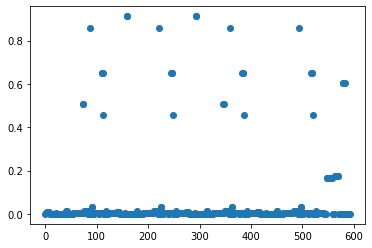

In [ ]:
# percentage of missing values in each column
secom_nan = pd.DataFrame(data_secom.isnull().sum(), columns=['nan_count'])
secom_nan['nan_percent'] = secom_nan['nan_count'] / len(data_secom)
plt.scatter(range(0, secom_nan.shape[0]),secom_nan['nan_percent'])
plt.show()

Drop the columns which contain more than 40% missing values:

In [ ]:
# columns with more than 40% missing values
secom_nan_40up = secom_nan[secom_nan['nan_percent'] > 0.4]
nan_column_droplist = secom_nan_40up.index
print("There are", secom_nan_40up.shape[0], "columns containing more than 40% missing values.")
nan_column_droplist

There are 32 columns containing more than 40% missing values.


Index(['Sensor_73', 'Sensor_74', 'Sensor_86', 'Sensor_110', 'Sensor_111',
       'Sensor_112', 'Sensor_113', 'Sensor_158', 'Sensor_159', 'Sensor_221',
       'Sensor_245', 'Sensor_246', 'Sensor_247', 'Sensor_248', 'Sensor_293',
       'Sensor_294', 'Sensor_346', 'Sensor_347', 'Sensor_359', 'Sensor_383',
       'Sensor_384', 'Sensor_385', 'Sensor_386', 'Sensor_493', 'Sensor_517',
       'Sensor_518', 'Sensor_519', 'Sensor_520', 'Sensor_579', 'Sensor_580',
       'Sensor_581', 'Sensor_582'],
      dtype='object')

In [ ]:
# clean dataset
data_secom_clean = data_secom_clean.drop(nan_column_droplist, axis = 1)
print(data_secom_clean.shape)

(1567, 444)


##### **Count Nan in each row:**


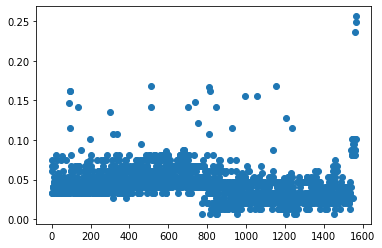

In [ ]:
# percentage of missing values in each row
secom_nan_row = pd.DataFrame(data_secom.isnull().sum(axis=1), columns=['nan_count'])
secom_nan_row['nan_percent'] = secom_nan_row['nan_count'] / len(data_secom.axes[1])
plt.scatter(range(0, secom_nan_row.shape[0]),secom_nan_row['nan_percent'])
plt.show()

There is no more than 25.7% of missing values in each observation. Therefore, we can impute the missing values.

##### **Missing Value Imputation: K-Nearest Neighbour (KNN) Imputation**


In [ ]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean') # default
data_secom_clean_imputed = pd.DataFrame(knn_imputer.fit_transform(data_secom_clean), columns=data_secom_clean.columns)
print(data_secom_clean_imputed.shape)
print ('Number of missing values: ', data_secom_clean_imputed.isnull().sum().sum())

(1567, 444)
Number of missing values:  0


###**(c) (5%) After data preprocessing, based on the prepared dataset, use the classification and regression tree (CART) to analyze the prepared dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.**


In [ ]:
data_secom_x = data_secom_clean_imputed.iloc[:, 1:-1]
data_secom_y = data_secom_clean_imputed['Label']

#### **K-fold cross validation with accuracy, AUC and F1-score using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html):**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 10-fold cross validation with several metrics
def ten_fold_cv_multimetrics(tree_classifier, x, y):
  parameters = {'max_depth': range(3,21)}
  # Set Accuracy as the main score (refit="Accuracy")
  clf = GridSearchCV(tree_classifier, parameters, cv=10, scoring = {"Accuracy": make_scorer(accuracy_score), "AUC": "roc_auc", "F1-score": make_scorer(f1_score, average='macro')}, refit="Accuracy")
  clf.fit(X=x, y=y)
  tree_model = clf.best_estimator_
  print ("Best accuracy:", clf.best_score_) 
  print ("Best depth:", clf.best_params_) 
  return clf

Reference:
[GridSearchCV with multiple evaluation metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html)

#### **CART classification results:**

In [ ]:
# Classification results
imbalanced_cart = ten_fold_cv_multimetrics(tree.DecisionTreeClassifier(criterion="gini", random_state=42), data_secom_x, data_secom_y)
cv_results = pd.DataFrame(imbalanced_cart.cv_results_)
cv_results

Best accuracy: 0.8743344765637759
Best depth: {'max_depth': 4}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,...,split3_test_F1-score,split4_test_F1-score,split5_test_F1-score,split6_test_F1-score,split7_test_F1-score,split8_test_F1-score,split9_test_F1-score,mean_test_F1-score,std_test_F1-score,rank_test_F1-score
0,0.184016,0.002668,0.012684,0.002655,3,{'max_depth': 3},0.656051,0.662420,0.910828,0.917197,...,0.478405,0.558651,0.480132,0.480132,0.507146,0.481728,0.480000,0.485039,0.041139,18
1,0.353359,0.193863,0.021911,0.019016,4,{'max_depth': 4},0.668790,0.783439,0.898089,0.917197,...,0.478405,0.558651,0.551429,0.478405,0.458333,0.481728,0.481728,0.496130,0.034215,15
2,0.349910,0.107819,0.016351,0.013973,5,{'max_depth': 5},0.585987,0.757962,0.917197,0.866242,...,0.464164,0.558651,0.558651,0.551429,0.458333,0.481728,0.476510,0.501295,0.044082,10
3,0.347089,0.002377,0.011954,0.001019,6,{'max_depth': 6},0.585987,0.694268,0.923567,0.840764,...,0.456747,0.478405,0.474916,0.614939,0.458333,0.533400,0.538851,0.498456,0.055487,12
4,0.403665,0.008978,0.012115,0.000726,7,{'max_depth': 7},0.649682,0.707006,0.898089,0.847134,...,0.458621,0.480132,0.544928,0.614939,0.452632,0.538851,0.551294,0.513198,0.050097,4
5,0.452333,0.008337,0.011768,0.000419,8,{'max_depth': 8},0.662420,0.751592,0.866242,0.796178,...,0.443262,0.478405,0.474916,0.614939,0.446809,0.566028,0.533400,0.497895,0.054394,13
6,0.507452,0.011683,0.012977,0.002208,9,{'max_depth': 9},0.656051,0.719745,0.859873,0.834395,...,0.454861,0.480132,0.471380,0.614939,0.444840,0.538851,0.533400,0.502373,0.049279,9
7,0.554428,0.007285,0.011701,0.000268,10,{'max_depth': 10},0.675159,0.707006,0.872611,0.808917,...,0.447183,0.476667,0.544928,0.614939,0.444840,0.552290,0.533400,0.502762,0.055543,8
8,0.605420,0.009058,0.011783,0.000423,11,{'max_depth': 11},0.681529,0.726115,0.904459,0.821656,...,0.451049,0.551429,0.539010,0.604866,0.442857,0.538462,0.533400,0.517708,0.048238,2
9,0.769410,0.114667,0.016566,0.003729,12,{'max_depth': 12},0.496815,0.738854,0.859873,0.834395,...,0.454861,0.476667,0.533571,0.595762,0.442857,0.548611,0.533400,0.496846,0.053396,14


In [ ]:
# Clean results
clf_results = cv_results[['param_max_depth', 'mean_test_Accuracy', 'rank_test_Accuracy', 'mean_test_AUC', 'rank_test_AUC', 'mean_test_F1-score', 'rank_test_F1-score']]
clf_results

,param_max_depth,mean_test_Accuracy,rank_test_Accuracy,mean_test_AUC,rank_test_AUC,mean_test_F1-score,rank_test_F1-score
0,3,0.864152,2,0.618358,1,0.485039,18
1,4,0.874334,1,0.568403,3,0.496130,15
2,5,0.859673,3,0.586688,2,0.501295,10
3,6,0.845643,5,0.558137,4,0.498456,12
4,7,0.853287,4,0.553006,5,0.513198,4
5,8,0.843059,8,0.511226,6,0.497895,13
6,9,0.843067,7,0.487251,8,0.502373,9
7,10,0.836653,9,0.463134,12,0.502762,8
8,11,0.844941,6,0.508800,7,0.517708,2
9,12,0.823293,14,0.472009,9,0.496846,14


###**(d) (5%) Suggest a method to address the data imbalance issue. Build a new balanced dataset. (Hint: undersampling or oversampling)**



In [ ]:
# Check if Y is imbalanced
data_secom_y.value_counts()

-1.0    1463
 1.0     104
Name: Label, dtype: int64

#### **SMOTE (oversampling)**
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [ ]:
from imblearn.over_sampling import SMOTE

data_secom_smote_x, data_secom_smote_y = SMOTE(random_state=42).fit_resample(data_secom_x, data_secom_y)
data_secom_smote_y.value_counts()

-1.0    1463
 1.0    1463
Name: Label, dtype: int64

###**(e) (5%) Based on the balanced dataset, use the classification and regression tree (CART) to analyze the balanced dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.**



In [ ]:
# Classification results
balanced_cart = ten_fold_cv_multimetrics(tree.DecisionTreeClassifier(criterion="gini", random_state=42), data_secom_smote_x, data_secom_smote_y)
cv_results_balanced = pd.DataFrame(balanced_cart.cv_results_)
cv_results_balanced

Best accuracy: 0.8677696479498808
Best depth: {'max_depth': 18}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,...,split3_test_F1-score,split4_test_F1-score,split5_test_F1-score,split6_test_F1-score,split7_test_F1-score,split8_test_F1-score,split9_test_F1-score,mean_test_F1-score,std_test_F1-score,rank_test_F1-score
0,0.392598,0.005502,0.012192,0.000514,3,{'max_depth': 3},0.426621,0.569966,0.716724,0.774744,...,0.773793,0.741407,0.877132,0.889535,0.848290,0.814990,0.650299,0.729314,0.140970,18
1,0.511722,0.004785,0.012977,0.001313,4,{'max_depth': 4},0.583618,0.627986,0.744027,0.805461,...,0.803400,0.760667,0.877132,0.875874,0.893775,0.832143,0.794482,0.775175,0.106206,17
2,0.638364,0.050853,0.013255,0.002404,5,{'max_depth': 5},0.563140,0.689420,0.805461,0.843003,...,0.842340,0.827159,0.870294,0.889666,0.897255,0.828373,0.828114,0.801459,0.101379,16
3,1.152665,0.579044,0.018100,0.009512,6,{'max_depth': 6},0.607509,0.696246,0.877133,0.829352,...,0.828470,0.808722,0.880407,0.851820,0.904069,0.863014,0.824880,0.811555,0.092905,15
4,1.118513,0.318977,0.018839,0.007652,7,{'max_depth': 7},0.621160,0.740614,0.880546,0.863481,...,0.862635,0.872718,0.880457,0.858992,0.921232,0.862782,0.869765,0.835220,0.087659,13
5,1.087290,0.283498,0.013787,0.003345,8,{'max_depth': 8},0.651877,0.726962,0.836177,0.894198,...,0.893797,0.826274,0.859748,0.872952,0.921210,0.886879,0.866362,0.831928,0.082583,14
6,0.982996,0.019909,0.012815,0.001637,9,{'max_depth': 9},0.648464,0.740614,0.856655,0.904437,...,0.904033,0.865484,0.883567,0.883365,0.907446,0.869471,0.859389,0.839669,0.082229,12
7,1.055257,0.031730,0.012257,0.000265,10,{'max_depth': 10},0.634812,0.744027,0.866894,0.901024,...,0.900649,0.858586,0.890416,0.907481,0.921188,0.872952,0.869765,0.844563,0.088569,11
8,1.119780,0.043127,0.012301,0.000397,11,{'max_depth': 11},0.627986,0.737201,0.866894,0.914676,...,0.914421,0.868839,0.897342,0.900590,0.910892,0.886602,0.876660,0.846482,0.092477,10
9,1.292905,0.170206,0.014210,0.003562,12,{'max_depth': 12},0.662116,0.744027,0.880546,0.918089,...,0.917873,0.862635,0.900908,0.910892,0.924601,0.879729,0.848968,0.851195,0.084370,8


In [ ]:
# Clean results
clf_results_balanced = cv_results_balanced[['param_max_depth', 'mean_test_Accuracy', 'rank_test_Accuracy', 'mean_test_AUC', 'rank_test_AUC', 'mean_test_F1-score', 'rank_test_F1-score']]
clf_results_balanced

,param_max_depth,mean_test_Accuracy,rank_test_Accuracy,mean_test_AUC,rank_test_AUC,mean_test_F1-score,rank_test_F1-score
0,3,0.732837,18,0.782628,18,0.729314,18
1,4,0.780340,17,0.815450,17,0.775175,17
2,5,0.804589,16,0.844335,11,0.801459,16
3,6,0.814828,15,0.848777,3,0.811555,15
4,7,0.837377,13,0.863462,1,0.835220,13
5,8,0.834658,14,0.847995,4,0.831928,14
6,9,0.842157,12,0.844845,10,0.839669,12
7,10,0.846953,11,0.840070,13,0.844563,11
8,11,0.849002,10,0.836544,16,0.846482,10
9,12,0.853435,8,0.845325,8,0.851195,8


###**(f) (5%) Give a comparison between (c) and (e). Any suggestion or insight?**



In [ ]:
imbalanced_best_score = clf_results.loc[[imbalanced_cart.best_index_]].T
balanced_best_score = clf_results_balanced.loc[[balanced_cart.best_index_]].T

compare_cart = pd.concat([imbalanced_best_score, balanced_best_score], axis=1)
compare_cart.columns = ['imbalanced', 'balanced']
compare_cart

,imbalanced,balanced
param_max_depth,4,18
mean_test_Accuracy,0.874334,0.86777
rank_test_Accuracy,1,1
mean_test_AUC,0.568403,0.846668
rank_test_AUC,3,6
mean_test_F1-score,0.49613,0.866955
rank_test_F1-score,15,1


Conclusion:


*   The classification accuracy of the imbalanced and the balanced dataset are 87.43% and 86.78% respectively. The difference between the two accuracy score is small.
*   Area under ROC curve (AUC) increases from 56.84% to 84.67% after oversampling the imbalanced dataset.
*   F1 score increases from 49.61% to 86.70% after oversampling the imbalanced dataset.
*   In this case, balanced dataset makes the model have better predicting ability.


###**(g) (5%) Use “Random Forest” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.**



In [ ]:
from sklearn import ensemble

# Imbalanced dataset
imbalanced_rfc = ten_fold_cv_multimetrics(ensemble.RandomForestClassifier(random_state=42), data_secom_x, data_secom_y)
cv_rfc_results = pd.DataFrame(imbalanced_rfc.cv_results_)
rfc_results = cv_rfc_results[['param_max_depth', 'mean_test_Accuracy', 'rank_test_Accuracy', 'mean_test_AUC', 'rank_test_AUC', 'mean_test_F1-score', 'rank_test_F1-score']]
rfc_results

Best accuracy: 0.9336354728074474
Best depth: {'max_depth': 3}


,param_max_depth,mean_test_Accuracy,rank_test_Accuracy,mean_test_AUC,rank_test_AUC,mean_test_F1-score,rank_test_F1-score
0,3,0.933635,1,0.581067,6,0.482838,4
1,4,0.933635,1,0.595701,1,0.482838,4
2,5,0.933635,1,0.585718,3,0.482838,4
3,6,0.933635,1,0.583887,4,0.482838,4
4,7,0.932999,5,0.544592,18,0.482668,8
5,8,0.932362,6,0.560158,14,0.482496,9
6,9,0.930451,14,0.586229,2,0.481975,15
7,10,0.931088,11,0.568039,9,0.482150,12
8,11,0.931088,11,0.567416,10,0.482150,12
9,12,0.931725,7,0.576341,7,0.482323,10


In [ ]:
# Balanced dataset
balanced_rfc = ten_fold_cv_multimetrics(ensemble.RandomForestClassifier(random_state=42), data_secom_smote_x, data_secom_smote_y)
cv_balanced_rfc_results = pd.DataFrame(balanced_rfc.cv_results_)
balanced_rfc_results = cv_balanced_rfc_results[['param_max_depth', 'mean_test_Accuracy', 'rank_test_Accuracy', 'mean_test_AUC', 'rank_test_AUC', 'mean_test_F1-score', 'rank_test_F1-score']]
balanced_rfc_results

Best accuracy: 0.9713275515451867
Best depth: {'max_depth': 20}


,param_max_depth,mean_test_Accuracy,rank_test_Accuracy,mean_test_AUC,rank_test_AUC,mean_test_F1-score,rank_test_F1-score
0,3,0.834075,18,0.901474,18,0.823154,18
1,4,0.868227,17,0.922463,17,0.858652,17
2,5,0.887338,16,0.946718,16,0.877927,16
3,6,0.907830,15,0.963641,15,0.901524,15
4,7,0.921494,14,0.976123,14,0.914849,14
5,8,0.929343,13,0.981496,13,0.923584,13
6,9,0.936168,12,0.985401,12,0.932297,12
7,10,0.946069,11,0.989357,10,0.943502,11
8,11,0.948116,10,0.989027,11,0.945866,10
9,12,0.950849,9,0.991169,9,0.948630,9


In [ ]:
imbalanced_best_score = rfc_results.loc[[imbalanced_rfc.best_index_]].T
balanced_best_score = balanced_rfc_results.loc[[balanced_rfc.best_index_]].T

compare_rfc = pd.concat([imbalanced_best_score, balanced_best_score], axis=1)
compare_rfc.columns = ['imbalanced', 'balanced']
compare_rfc

,imbalanced,balanced
param_max_depth,3,20
mean_test_Accuracy,0.933635,0.971328
rank_test_Accuracy,1,1
mean_test_AUC,0.581067,0.993966
rank_test_AUC,6,1
mean_test_F1-score,0.482838,0.970922
rank_test_F1-score,4,1


Conclusion:

*   The classification accuracy of the balanced dataset is 97.13% which is higher than that of the imbalanced dataset (93.36%).
*   Area under ROC curve (AUC) increases from 58.11% to 99.40% after oversampling the imbalanced dataset.
*   F1 score increases from 48.28% to 97.09% after oversampling the imbalanced dataset.
*   In this case, balanced dataset makes the model have better predicting ability and accuracy.

###**(h) (5%) Use “Gradient Boosting Decision Tree (GBDT)” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.**



In [ ]:
import lightgbm as lgb

# Imbalanced dataset
imbalanced_gbc = ten_fold_cv_multimetrics(lgb.LGBMClassifier(random_state = 42), data_secom_x, data_secom_y)
cv_gbc_results = pd.DataFrame(imbalanced_gbc.cv_results_)
gbc_results = cv_gbc_results[['param_max_depth', 'mean_test_Accuracy', 'rank_test_Accuracy', 'mean_test_AUC', 'rank_test_AUC', 'mean_test_F1-score', 'rank_test_F1-score']]
gbc_results

Best accuracy: 0.9196227339539442
Best depth: {'max_depth': 6}


,param_max_depth,mean_test_Accuracy,rank_test_Accuracy,mean_test_AUC,rank_test_AUC,mean_test_F1-score,rank_test_F1-score
0,3,0.911342,18,0.534102,1,0.481660,15
1,4,0.917075,3,0.531620,3,0.484598,6
2,5,0.916438,4,0.529868,4,0.483791,8
3,6,0.919623,1,0.525783,8,0.488208,1
4,7,0.911979,17,0.519807,9,0.481672,14
5,8,0.916438,4,0.517701,10,0.486203,2
6,9,0.915164,8,0.528634,5,0.485600,3
7,10,0.915801,7,0.527199,6,0.481255,16
8,11,0.913253,14,0.532825,2,0.482526,11
9,12,0.914527,10,0.514838,15,0.480532,17


In [ ]:
# Balanced dataset
balanced_gbc = ten_fold_cv_multimetrics(lgb.LGBMClassifier(random_state=42), data_secom_smote_x, data_secom_smote_y)
cv_balanced_gbc_results = pd.DataFrame(balanced_gbc.cv_results_)
balanced_gbc_results = cv_balanced_gbc_results[['param_max_depth', 'mean_test_Accuracy', 'rank_test_Accuracy', 'mean_test_AUC', 'rank_test_AUC', 'mean_test_F1-score', 'rank_test_F1-score']]
balanced_gbc_results

Best accuracy: 0.9583606059189304
Best depth: {'max_depth': 13}


,param_max_depth,mean_test_Accuracy,rank_test_Accuracy,mean_test_AUC,rank_test_AUC,mean_test_F1-score,rank_test_F1-score
0,3,0.934112,18,0.966736,18,0.933006,18
1,4,0.946746,17,0.975860,17,0.946164,17
2,5,0.948455,16,0.979601,16,0.947764,16
3,6,0.953236,15,0.982182,2,0.952694,14
4,7,0.953239,14,0.981884,4,0.952662,15
5,8,0.953921,13,0.981498,8,0.953465,13
6,9,0.954264,12,0.980603,15,0.953916,12
7,10,0.954946,11,0.981442,9,0.954578,11
8,11,0.958018,3,0.981908,3,0.957679,3
9,12,0.956993,8,0.982196,1,0.956665,8


In [ ]:
imbalanced_best_score = gbc_results.loc[[imbalanced_gbc.best_index_]].T
balanced_best_score = balanced_gbc_results.loc[[balanced_gbc.best_index_]].T

compare_gbc = pd.concat([imbalanced_best_score, balanced_best_score], axis=1)
compare_gbc.columns = ['imbalanced', 'balanced']
compare_gbc

,imbalanced,balanced
param_max_depth,6,13
mean_test_Accuracy,0.919623,0.958361
rank_test_Accuracy,1,1
mean_test_AUC,0.525783,0.981861
rank_test_AUC,8,5
mean_test_F1-score,0.488208,0.958101
rank_test_F1-score,1,2


Conclusion:

*   The classification accuracy of the balanced dataset is 95.84% which is higher than that of the imbalanced dataset (91.96%).
*   Area under ROC curve (AUC) increases from 52.58% to 98.19% after oversampling the imbalanced dataset.
*   F1 score increases from 48.82% to 95.81% after oversampling the imbalanced dataset.
*   In this case, balanced dataset makes the model have better predicting ability and accuracy.



---


##**2. (40%) Feature Selection**

在 Kaggle 開放數據中包含了一個挖礦製程的浮選廠數據([a flotation plant in a mining process](https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process))，一共包含 24 個特徵。硬件傳感器，如溫度、pH 值、流量、密度和所有連續過程變量，每 20 秒收集一次數據。其他某些特徵每小時採樣一次。品質特徵，如二氧化矽含量百分比、鐵礦石含量百分比等，是通過實驗室分析進行的品質測量。每 15 分鐘在現場收集一次鐵礦漿樣本。 這些樣本被送到實驗室進行分析，每兩小時提供一次品質分析結果。據上述描述，將因子 「% Silica Concentrate 含二氧化矽濃度百分比」作為應變量(y)且其他所有因子(除日期和 % Iron Concentrate 含鐵濃度百分比外)均為自變量(x)，如何找出影響 y 的重要因子呢？若能建構預測模型，提前幾個小時來預測二氧化矽濃度百分比，這將幫助工程師以預測和優化的方式來減少可能進入後製程的鐵百分比。試著參考網路資源學習並撰寫程式，使用此數據回答下列問題。


In [3]:
data_mp = pd.read_csv('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 3/Assignment3_Data/MiningProcess_Flotation_Plant_Database.csv')
print(data_mp.shape)
data_mp.head()

(737453, 24)


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [4]:
# Clean the dataset
data_mp = data_mp.drop(columns = ['date']) # drop the 'date' column
for column in data_mp.columns:
    data_mp[column] = data_mp[column].apply(lambda x: x.replace(',', '.'))
print(data_mp.shape)
data_mp.head()

(737453, 23)


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,250.313,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31


In [5]:
data_mp = data_mp.astype(float)
data_mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

In [6]:
data_mp_x = data_mp.iloc[:,:-2]
data_mp_y = data_mp.iloc[:,-1:]

###**(a) 試使用線性迴歸以最小平方法估計迴歸係數，並說明重要變數（例如排序 p-value 或 t 統計量）。**

In [7]:
# ols
import statsmodels.api as sm
data_mp_x_c = sm.add_constant(data_mp_x) # add intercept
ols = sm.OLS(data_mp_y, data_mp_x_c)
ols_result = ols.fit()
print(ols_result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                             
Dep. Variable:     % Silica Concentrate   R-squared:                       0.153
Model:                              OLS   Adj. R-squared:                  0.153
Method:                   Least Squares   F-statistic:                     6339.
Date:                  Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                          09:11:31   Log-Likelihood:            -1.0724e+06
No. Observations:                737453   AIC:                         2.145e+06
Df Residuals:                    737431   BIC:                         2.145e+06
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [8]:
from IPython.display import display
pd.set_option('display.float_format', lambda x: '%.6f' % x) # 消除科學記號

ols_analysis = pd.concat([ols_result.params, ols_result.bse, ols_result.tvalues, ols_result.pvalues], axis=1)
ols_analysis.columns = ["estimate", "std. error", "t-value", "p-value"]

# Sort variables by their p-values
ols_analysis_sorted = ols_analysis.iloc[1:,:].sort_values(by=['p-value']) # const excluded

display(ols_analysis_sorted)
print("R-squared: ", round(ols_result.rsquared,4), ", Adjusted R-squared: ", round(ols_result.rsquared_adj,4))

,estimate,std. error,t-value,p-value
Flotation Column 04 Air Flow,0.035313,0.000606,58.273702,0.000000
Flotation Column 05 Level,-0.001171,0.000024,-49.737881,0.000000
Amina Flow,0.003230,0.000019,166.209562,0.000000
Ore Pulp pH,-0.325909,0.003412,-95.517743,0.000000
Ore Pulp Density,-1.934304,0.024686,-78.355714,0.000000
Flotation Column 01 Air Flow,-0.008860,0.000143,-61.998485,0.000000
Flotation Column 03 Air Flow,-0.005496,0.000157,-35.021368,0.000000
Starch Flow,-0.000038,0.000001,-34.460723,0.000000
Flotation Column 06 Air Flow,0.002798,0.000083,33.570271,0.000000
Ore Pulp Flow,-0.004644,0.000139,-33.503226,0.000000


R-squared:  0.1529 , Adjusted R-squared:  0.1529


In [9]:
# Variables with p-value < 0.01
print("Statistically significant variables with p-values < 0.01: ")
ols_important_features = ols_analysis_sorted.index[ols_analysis_sorted['p-value'] < 0.01].tolist()
ols_important_features

Statistically significant variables with p-values < 0.01: 


['Flotation Column 04 Air Flow',
 'Flotation Column 05 Level',
 'Amina Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 03 Air Flow',
 'Starch Flow',
 'Flotation Column 06 Air Flow',
 'Ore Pulp Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 04 Level',
 'Flotation Column 07 Level',
 'Flotation Column 03 Level',
 'Flotation Column 02 Air Flow',
 'Flotation Column 01 Level',
 '% Silica Feed',
 'Flotation Column 06 Level',
 'Flotation Column 02 Level',
 '% Iron Feed']

###**(b) 試使用逐步迴歸找出重要變數。**

####**Backward Stepwise Regression**

Reference: https://github.com/AakkashVijayakumar/stepwise-regression

In [10]:
def backward_regression(X, y, initial_list=[], threshold_out = 0.01, verbose=True):
    included = list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop',worst_feature,'with p-value', worst_pval)
        if not changed:
            break
    return included

In [11]:
backward_important_features = backward_regression(data_mp_x, data_mp_y)
print("Statistically significant variables by backward stepwise regression: ")
backward_important_features

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Drop Flotation Column 07 Air Flow with p-value 0.2724304950869769


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Statistically significant variables by backward stepwise regression: 


['% Iron Feed',
 '% Silica Feed',
 'Starch Flow',
 'Amina Flow',
 'Ore Pulp Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 01 Level',
 'Flotation Column 02 Level',
 'Flotation Column 03 Level',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level']

###**(c) 試比較(a)與(b)的結果是否一致？有何不同？**




In [12]:
if ols_important_features.sort() == backward_important_features.sort(): 
    print ("Important features of OLS and those of backward stepwise regression are the same.") 
else: 
    print ("Important features of OLS and those of backward stepwise regression are NOT the same.") 

Important features of OLS and those of backward stepwise regression are the same.


Conclusion:

*   OLS 以 p-value < 0.01 作為重要變數
*   Backward stepwise regression 剔除變數的 threshold 設為 0.01
*   由上方比較結果可以看到兩者所選出的重要變數是一致的

###**(d) 試使用脊迴歸挑選重要變數。**

#### **Ridge Regression**

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV

In [13]:
# Find the best Ridge regression model by cross-validation
from sklearn.linear_model import RidgeCV
best_ridge = RidgeCV(alphas=[0.0001, 1, 10, 100, 10000000000000]).fit(data_mp_x_c, data_mp_y)
best_ridge_alpha = best_ridge.alpha_
print("Best alpha =", best_ridge_alpha)

Best alpha = 0.0001


In [14]:
# Ridge regression
from sklearn.linear_model import Ridge
def ridge(alphas):
    df = pd.DataFrame()
    df['Feature Name'] = data_mp_x_c.columns
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        ridge.fit(data_mp_x_c, data_mp_y)
        column_name = 'Alpha = %f' % alpha
        df[column_name] = ridge.coef_.T
    return df

In [15]:
# Results with different alphas
ridge_result = ridge([0.0001, 1, 10, 100, 10000000000000]) # default alphas
ridge_result

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.9494e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


,Feature Name,Alpha = 0.000100,Alpha = 1.000000,Alpha = 10.000000,Alpha = 100.000000,Alpha = 10000000000000.000000
0,const,0.000000,0.000000,0.000000,0.000000,0.000000
1,% Iron Feed,-0.002727,-0.002724,-0.002695,-0.002417,-0.000000
2,% Silica Feed,0.007823,0.007825,0.007842,0.008004,0.000000
3,Starch Flow,-0.000038,-0.000038,-0.000039,-0.000039,-0.000006
4,Amina Flow,0.003230,0.003229,0.003224,0.003177,0.000001
5,Ore Pulp Flow,-0.004644,-0.004643,-0.004631,-0.004517,0.000000
6,Ore Pulp pH,-0.325909,-0.325921,-0.326032,-0.327063,-0.000000
7,Ore Pulp Density,-1.934304,-1.933209,-1.923410,-1.830626,0.000000
8,Flotation Column 01 Air Flow,-0.008860,-0.008860,-0.008865,-0.008906,-0.000001
9,Flotation Column 02 Air Flow,0.001072,0.001071,0.001070,0.001054,-0.000000


In [16]:
# Variables with |coef| > 0
print("Statistically significant variables when alpha =", 10000000000000)
ridge_important_features = ridge_result['Feature Name'][round(ridge_result['Alpha = %f' % 10000000000000].abs(), 6) > 0].tolist()
ridge_important_features

Statistically significant variables when alpha = 10000000000000


['Starch Flow',
 'Amina Flow',
 'Flotation Column 01 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level']

###**(e) 試使用套索迴歸或適應性套索迴歸挑選重要變數。**

#### **Lasso Regression**

Reference: https://machinelearninghd.com/lasso-regression-in-python/


In [17]:
# Find the best Lasso regression model by cross-validation
from sklearn.linear_model import LassoCV
best_lasso = LassoCV().fit(data_mp_x_c, data_mp_y)
best_lasso_alpha = best_lasso.alpha_
print("Best alpha =", best_lasso_alpha)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha = 2.0978645740735415


In [18]:
# Lasso regression
from sklearn.linear_model import Lasso
def lasso(alphas):
    df = pd.DataFrame()
    df['Feature Name'] = data_mp_x_c.columns
    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(data_mp_x_c, data_mp_y)
        column_name = 'Alpha = %f' % alpha
        df[column_name] = lasso.coef_       
    return df

In [19]:
lasso_result = lasso([0.0001, 0.5, 1, best_lasso_alpha, 10])
lasso_result

,Feature Name,Alpha = 0.000100,Alpha = 0.500000,Alpha = 1.000000,Alpha = 2.097865,Alpha = 10.000000
0,const,0.000000,0.000000,0.000000,0.000000,0.000000
1,% Iron Feed,-0.002595,-0.000000,-0.000000,-0.000000,-0.000000
2,% Silica Feed,0.007901,0.000997,0.000000,0.000000,0.000000
3,Starch Flow,-0.000039,-0.000072,-0.000069,-0.000069,-0.000073
4,Amina Flow,0.003208,0.002002,0.001933,0.001783,0.000835
5,Ore Pulp Flow,-0.004597,-0.000125,-0.000000,-0.000000,-0.000000
6,Ore Pulp pH,-0.325713,-0.000000,-0.000000,-0.000000,-0.000000
7,Ore Pulp Density,-1.893040,-0.000000,-0.000000,-0.000000,0.000000
8,Flotation Column 01 Air Flow,-0.008876,-0.007701,-0.006961,-0.006271,-0.000000
9,Flotation Column 02 Air Flow,0.001065,-0.000000,-0.000000,-0.000000,-0.000000


In [20]:
# Variables with |coef| > 0
print("Statistically significant variables with |coef| > 0 when alpha =", best_lasso_alpha)
lasso_important_features = lasso_result['Feature Name'][lasso_result['Alpha = %f' % best_lasso_alpha].abs() > 0].tolist()
lasso_important_features

Statistically significant variables with |coef| > 0 when alpha = 2.0978645740735415


['Starch Flow',
 'Amina Flow',
 'Flotation Column 01 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 03 Level',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 07 Level']

###**(f) 試比較(d)與(e)的結果是否一致？有何不同？**




In [21]:
print("Important features in Ridge Regression:\n", str(ridge_important_features))
print("Important features in Lasso Regression:\n", str(lasso_important_features))

Important features in Ridge Regression:
 ['Starch Flow', 'Amina Flow', 'Flotation Column 01 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level']
Important features in Lasso Regression:
 ['Starch Flow', 'Amina Flow', 'Flotation Column 01 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 07 Level']


Lasso regression:

*   透過 cross validation 我們可以找到最佳模型，而該模型的 alpha = 2.0978
*   由於 lasso regression 隨著懲罰增加，可將部分係數壓縮為零，因此我們可以找到 8 個特徵係數絕對值大於 0，視為重要變數（如上方所呈現）


Ridge regression:

*   Ridge regression 隨懲罰增加，會將所有係數慢慢壓縮逼近於零，但不等於零，因此較難做特徵挑選
*   若將 lambda 設的非常大，且係數取至小數點後第六位，也可以找出 8 個係數絕對值大於 0 的重要特徵（如上方所呈現）

比較：

*   各自挑選的 8 個重要變數中有 7 個相同：Starch Flow、Amina Flow、Flotation Column 01 Air Flow、Flotation Column 03 Air Flow、Flotation Column 04 Level、Flotation Column 05 Level、Flotation Column 07 Level
*   不同之處在於 ridge regression 將 Flotation Column 06 Level 視為重要變數，而 lasso regression 將 Flotation Column 03 Level 視為重要變數



###**(g) 在特徵中那些特徵彼此之間高相關？若以線性迴歸預測，請問是否有共線性的問題？**


#### **Highly correlated features:**

Reference: https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/


In [22]:
# Create correlation matrix
corr_matrix = data_mp_x.corr()
  
# Retain upper triangular values of correlation matrix and make lower triangular values Null
upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_matrix.unstack().dropna()
  
# Sort correlation pairs
sorted_matrix = unique_corr_pairs.sort_values(ascending=False)
print(sorted_matrix)

Flotation Column 03 Air Flow  Flotation Column 01 Air Flow    0.954528
                              Flotation Column 02 Air Flow    0.860438
Flotation Column 07 Air Flow  Flotation Column 06 Air Flow    0.854067
Flotation Column 02 Air Flow  Flotation Column 01 Air Flow    0.848277
Flotation Column 03 Level     Flotation Column 01 Level       0.725294
                                                                ...   
Flotation Column 02 Level     Flotation Column 01 Air Flow   -0.425758
Flotation Column 01 Level     Flotation Column 02 Air Flow   -0.432033
                              Flotation Column 03 Air Flow   -0.440823
                              Flotation Column 01 Air Flow   -0.441573
% Silica Feed                 % Iron Feed                    -0.971833
Length: 210, dtype: float64


In [23]:
# Correlation < -0.7 or > 0.7
high_corr = sorted_matrix.loc[lambda x : (x < -0.7) | (x > 0.7)]
print("Highly correlated features:")
print(high_corr)

Highly correlated features:
Flotation Column 03 Air Flow  Flotation Column 01 Air Flow    0.954528
                              Flotation Column 02 Air Flow    0.860438
Flotation Column 07 Air Flow  Flotation Column 06 Air Flow    0.854067
Flotation Column 02 Air Flow  Flotation Column 01 Air Flow    0.848277
Flotation Column 03 Level     Flotation Column 01 Level       0.725294
Flotation Column 02 Level     Flotation Column 01 Level       0.717500
Flotation Column 07 Level     Flotation Column 05 Level       0.710699
% Silica Feed                 % Iron Feed                    -0.971833
dtype: float64


#### **Detect collinearity with VIF:**


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = data_mp_x.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_mp_x.values, i) for i in range(len(data_mp_x.columns))]
vif_data

,feature,VIF
0,% Iron Feed,2152.742020
1,% Silica Feed,100.584551
2,Starch Flow,8.288034
3,Amina Flow,63.483550
4,Ore Pulp Flow,2011.768791
5,Ore Pulp pH,760.731618
6,Ore Pulp Density,1122.475807
7,Flotation Column 01 Air Flow,1110.075107
8,Flotation Column 02 Air Flow,371.254137
9,Flotation Column 03 Air Flow,1350.966609


All of the features have VIF > 5 and most of them are > 10, which means features are highly correlated. Multicollinearity exists.

###**(h) 是否可用含鐵濃度百分比來建模預測含二氧化矽濃度百分比？為什麼？可能有什麼潛在問題？如何解決？**




In [25]:
data_mp_x_iron = data_mp.iloc[:,:-1]
data_mp_x_iron_c = sm.add_constant(data_mp_x_iron) # add intercept
ols_iron = sm.OLS(data_mp_y, data_mp_x_iron_c)
ols_iron_result = ols_iron.fit()
print("Without % Iron Concentrate:")
print("R-squared: ", round(ols_result.rsquared,4), ", Adjusted R-squared: ", round(ols_result.rsquared_adj,4))
print("With % Iron Concentrate:")
print("R-squared: ", round(ols_iron_result.rsquared,4), ", Adjusted R-squared: ", round(ols_iron_result.rsquared_adj,4))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Without % Iron Concentrate:
R-squared:  0.1529 , Adjusted R-squared:  0.1529
With % Iron Concentrate:
R-squared:  0.6794 , Adjusted R-squared:  0.6794


若單就預測模型來看，加上含鐵濃度百分比這項變數能夠使模型解釋力從 0.1529 上升至 0.6794（如上方所呈現），似乎是可行的。然而就常識而言，含鐵濃度並不是影響含二氧化矽濃度的因素，只是兩者可能有共同影響因素，使得將含鐵濃度作為特徵能夠增加預測含二氧化矽濃度的解釋力。此外，含鐵濃度和含二氧化矽濃度同樣是「分析」出來的品質特徵，而非直接從硬件傳感器收集而來的數據，將同一時間的含鐵濃度拿來預測含二氧化矽濃度實際上也不可行，因為兩者的分析時長與取得結果的時間可能差不多。若真的要將含鐵濃度百分比作為預測含二氧化矽濃度百分比的變數，可能要使用不同時間的含鐵濃度才可行，但效果需要實際嘗試過才能知道。



---


##**3. (20%) Deep Learning**

Use Python to build up backpropagation network (BPN) (or convolutional neural network, CNN) for “handwritten digit recognition”. Data set (MDS_Assignment3_DRtraining.xlsx) is collected from the Semeion Research Center of Sciences of Communication. It is available in text form and contains 1593 handwritten digits from 80 persons. The images are 16 × 16 pixels square box and in black and white format. (teacher took 15 samples for validation and you only see 1578 samples)
Each record represents a handwritten digit, originally scanned with a resolution of 256 grays scale. Each pixel of each original scanned image was first stretched, and after scaled between 0 and 1 (setting to 0 every pixel whose value was under a fixed threshold value 127 of the grey scale (127 included), and setting to 1 each pixel whose original value in the grey scale was over 127).

We name variable “Pixel001” to “Pixel256”. After the array of pixels there is information what digit the image depicts, i.e., “Target0” to “Target9”. We use 256 nodes in input layer representing “Pixel” binary variable, and 10 nodes for output layer representing “Target” binary variable, i.e., 0 to 9.

The pixel format is shown as following figure.

<img src="https://drive.google.com/uc?export=view&id=1DqTokN87dsMzKwMeb3Nmb4iTWYYBkjOU" width="500"/>

The digit “3”, for example, is shown as following figure.

<img src="https://drive.google.com/uc?export=view&id=1JWu7qzMT3qJSi6_htnS1yIZrjRWypRY3" width="500"/>

Any question, you can google it (keyword: digit recognition) or refer to the following linkage.
https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

If you would like to use Tensorflow, Keras, numpy, and pillow, you may refer to
https://medium.com/analytics-vidhya/deep-learning-project-handwritten-digit-recognition-using-python-26da7ed11d1c

###**(a) (15%) For BPN (or CNN if you prefer), try to investigate the effects of changing “PARAMETERS” such as learning rates, momentum, number of hidden/convolutional layers, dropout rate, etc. Show the numerical results and “DIAGRAM” from different perspectives (e.g., MSE/accuracy, F1-score, convergence time, error of training data, error of testing data, etc.). Please show all your work in detail, in particular, you “MAY” need to design your experiments with different parameters systematically.**



#### **Step 1: Preprocessing**

In [ ]:
# training set
dr_train = pd.read_excel('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 3/Assignment3_Data/MDS_Assignment3_DRtraining.xlsx')
print(dr_train.shape)
dr_train.head()

(1578, 267)


,No.,Pixel001,Pixel002,Pixel003,Pixel004,Pixel005,Pixel006,Pixel007,Pixel008,Pixel009,...,Target0,Target1,Target2,Target3,Target4,Target5,Target6,Target7,Target8,Target9
0,1,0,0,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Split the data to x and y
dr_train_x = dr_train.iloc[:, 1:-10].to_numpy()
print("dr_train_x", dr_train_x.shape)
dr_train_y = dr_train.iloc[:, -10:].to_numpy()
print("dr_train_y", dr_train_y.shape)

dr_train_x (1578, 256)
dr_train_y (1578, 10)


In [ ]:
# Reshape the data to samples*pixels*width*height
dr_train_x = dr_train_x.reshape(dr_train_x.shape[0], 16, 16, 1).astype('float32')
print("dr_train_x", dr_train_x.shape)

dr_train_x (1578, 16, 16, 1)


In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
dr_train_x, dr_test_x, dr_train_y, dr_test_y = train_test_split(dr_train_x, dr_train_y, test_size=0.1, random_state=42)
print("dr_train_x", dr_train_x.shape)
print("dr_train_y", dr_train_y.shape)
print("dr_test_x", dr_test_x.shape)
print("dr_test_y", dr_test_y.shape)

dr_train_x (1420, 16, 16, 1)
dr_train_y (1420, 10)
dr_test_x (158, 16, 16, 1)
dr_test_y (158, 10)


In [ ]:
# Number of classes
num_classes = dr_train_y.shape[1]
print("num_classes =", num_classes)

num_classes = 10


#### **Step 2: Defining the CNN model architecture**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras import backend as K

In [ ]:
# Create model
def create_model(dropout):
  model = Sequential()
  model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(16, 16, 1)))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(dropout))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(dropout))
  model.add(Dense(num_classes, activation='softmax'))
  return model

#### **Step 3: Compile the model**

In [ ]:
def compile_model(dropout, epoch):
  model = create_model(dropout)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(dr_train_x, dr_train_y, validation_data=(dr_test_x, dr_test_y), epochs=epoch, batch_size=128)
  return model, history

#### **Step 4: Evaluate models with different dropout rates**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def eval_model(model, dropout):
  dr_test_pred = model.predict(dr_test_x).argmax(axis=1)
  dr_test_y_target = dr_test_y.argmax(axis=1)
  train_eval = model.evaluate(dr_train_x, dr_train_y)
  test_eval = model.evaluate(dr_test_x, dr_test_y)
  # Accuracy
  acc = accuracy_score(dr_test_y_target, dr_test_pred)
  # F1 score
  macro_f1 = f1_score(dr_test_y_target, dr_test_pred, average='macro')
  # loss of train
  loss_train = train_eval[0]
  # loss of test
  loss_test = test_eval[0]
  df = pd.DataFrame([[dropout, acc, macro_f1, loss_train, loss_test]], columns=['dropout rate', 'accuracy', 'F1-score', 'loss of training data', 'loss of testing data'])
  return df

In [ ]:
eval_model_dropout = pd.DataFrame(columns=['dropout rate', 'accuracy', 'F1-score', 'loss of training data', 'loss of testing data'])
for i in np.arange(0,0.55,0.05):
  model, history = compile_model(i, 20)
  eval_model_dropout = eval_model_dropout.append(eval_model(model, i), ignore_index=True)

Epoch 1/20
12/12 [==============================] - 5s 345ms/step - loss: 1.4931 - accuracy: 0.5099 - val_loss: 0.6220 - val_accuracy: 0.8101
Epoch 2/20
12/12 [==============================] - 4s 319ms/step - loss: 0.5649 - accuracy: 0.8183 - val_loss: 0.3754 - val_accuracy: 0.8861
Epoch 3/20
12/12 [==============================] - 4s 325ms/step - loss: 0.2567 - accuracy: 0.9289 - val_loss: 0.2496 - val_accuracy: 0.9114
Epoch 4/20
12/12 [==============================] - 4s 317ms/step - loss: 0.1328 - accuracy: 0.9563 - val_loss: 0.2252 - val_accuracy: 0.9114
Epoch 5/20
12/12 [==============================] - 4s 320ms/step - loss: 0.0659 - accuracy: 0.9796 - val_loss: 0.1440 - val_accuracy: 0.9367
Epoch 6/20
12/12 [==============================] - 4s 315ms/step - loss: 0.0267 - accuracy: 0.9951 - val_loss: 0.1323 - val_accuracy: 0.9557
Epoch 7/20
12/12 [==============================] - 4s 316ms/step - loss: 0.0130 - accuracy: 0.9986 - val_loss: 0.1560 - val_accuracy: 0.9557
Epoch 

In [ ]:
eval_model_dropout

,dropout rate,accuracy,F1-score,loss of training data,loss of testing data
0,0.00,0.962025,0.959210,0.000204,0.156143
1,0.05,0.917722,0.920848,0.006760,0.259533
2,0.10,0.962025,0.965274,0.000297,0.099966
3,0.15,0.949367,0.951544,0.000293,0.146840
4,0.20,0.974684,0.976000,0.000265,0.127141
5,0.25,0.974684,0.973782,0.000499,0.108736
6,0.30,0.968354,0.968725,0.000671,0.076913
7,0.35,0.962025,0.964114,0.000906,0.146770
8,0.40,0.949367,0.948382,0.002145,0.149607
9,0.45,0.987342,0.989991,0.003194,0.052585


<function matplotlib.pyplot.show(*args, **kw)>

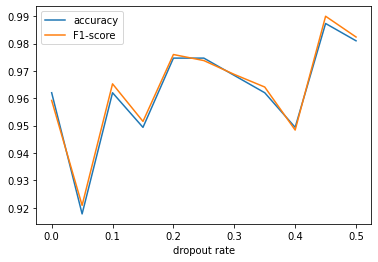

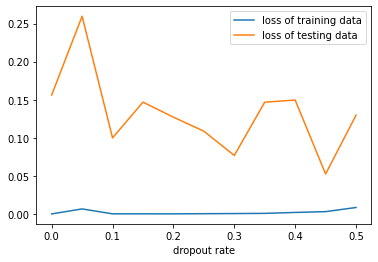

In [ ]:
# Plot the scores with different dropout rate
eval_model_dropout.plot(x="dropout rate", y=["accuracy", "F1-score"])
plt.show

# Plot the losses with different dropout rate
eval_model_dropout.plot(x="dropout rate", y=["loss of training data", "loss of testing data"])
plt.show

From the graphs above, we can see that a model with a 0.45 dropout rate has the highest accuracy and F1-score. Meanwhile, the model has the lowest loss rate on the testing data. In addition, a model with a 0.05 dropout rate has the lowest accuracy and F1-score and the highest loss rate on the testing data. However, we cannot conclude that a model will have a higher score and a lower loss rate as the dropout rate increases in this case since the scores and the loss rates fluctuate as the dropout rate increases. We can only confirm that changing the dropout rate does affect the performance of a model.

#### **Step 5: Choose a best model**

In [ ]:
final_dropout = eval_model_dropout['dropout rate'].loc[eval_model_dropout.index[eval_model_dropout['accuracy'].idxmax()]]
print("Dropout rate: ", final_dropout)

Dropout rate:  0.45


In [ ]:
# Compile the model
final_epoch = 20
model, history = compile_model(final_dropout, final_epoch)

Epoch 1/20
12/12 [==============================] - 6s 452ms/step - loss: 2.2902 - accuracy: 0.2007 - val_loss: 1.5702 - val_accuracy: 0.6013
Epoch 2/20
12/12 [==============================] - 4s 323ms/step - loss: 1.4439 - accuracy: 0.5162 - val_loss: 0.8566 - val_accuracy: 0.7342
Epoch 3/20
12/12 [==============================] - 4s 327ms/step - loss: 0.9045 - accuracy: 0.7049 - val_loss: 0.5651 - val_accuracy: 0.8608
Epoch 4/20
12/12 [==============================] - 4s 322ms/step - loss: 0.6790 - accuracy: 0.7789 - val_loss: 0.3471 - val_accuracy: 0.9051
Epoch 5/20
12/12 [==============================] - 4s 322ms/step - loss: 0.4710 - accuracy: 0.8514 - val_loss: 0.2364 - val_accuracy: 0.9241
Epoch 6/20
12/12 [==============================] - 4s 334ms/step - loss: 0.3639 - accuracy: 0.8768 - val_loss: 0.1941 - val_accuracy: 0.9430
Epoch 7/20
12/12 [==============================] - 4s 321ms/step - loss: 0.2749 - accuracy: 0.9148 - val_loss: 0.2193 - val_accuracy: 0.9177
Epoch 

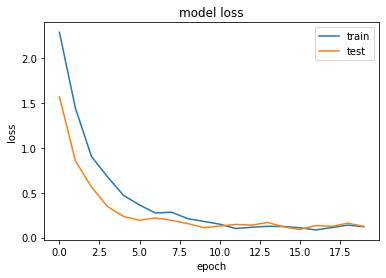

In [ ]:
# Plot the loss rates
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
eval_model(model, final_dropout)

5/5 [==============================] - 0s 24ms/step - loss: 0.1248 - accuracy: 0.9557


,dropout rate,accuracy,F1-score,loss of training data,loss of testing data
0,0.45,0.955696,0.961359,0.010407,0.124797


###**(b) (5%) Please predict the digit No.1579 to No.1593 (data source: MDS_Assignment3_ DRpredict.xlsx) using your best established BPN/CNN model in (a) and fill out the following table.**

<img src="https://drive.google.com/uc?export=view&id=1AtnqO-49R6CGCjT_rMxBGnyDH-8AywYM" width="350"/>


In [ ]:
# Predicting data
dr_pred = pd.read_excel('/content/gdrive/MyDrive/碩二上/製造數據科學/Assignment/Assignment 3/Assignment3_Data/MDS_Assignment3_DRpredict.xlsx')
print(dr_pred.shape)
dr_pred.head()

(15, 267)


,No.,Pixel001,Pixel002,Pixel003,Pixel004,Pixel005,Pixel006,Pixel007,Pixel008,Pixel009,...,Target0,Target1,Target2,Target3,Target4,Target5,Target6,Target7,Target8,Target9
0,1579,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1580,0,0,0,0,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1581,0,0,0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1582,0,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1583,0,0,0,0,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Reshape the data to samples*pixels*width*height
dr_pred_x = dr_pred.iloc[:, 1:-10].to_numpy()
dr_pred_x = dr_pred_x.reshape(dr_pred_x.shape[0], 16, 16, 1).astype('float32')
print("dr_pred_x", dr_pred_x.shape)

dr_pred_x (15, 16, 16, 1)


In [ ]:
# Predict the predicting data
dr_pred_pred = model.predict(dr_pred_x).argmax(axis=1)

id = dr_pred[['No.']]
pred_result = pd.concat([id, pd.DataFrame({'Digit Number (0-9) you predict': dr_pred_pred})], axis=1)
pred_result

1/1 [==============================] - 0s 31ms/step


,No.,Digit Number (0-9) you predict
0,1579,4
1,1580,0
2,1581,5
3,1582,0
4,1583,5
5,1584,0
6,1585,5
7,1586,0
8,1587,2
9,1588,5
